# Water Leakage Model
## Miriam Anozie

### Detecting Leakage from a Water Demand Perspective

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [4]:
water_dataset = pd.read_excel('water_usage_data.xlsx')

### Understanding the dataset

In [6]:
water_dataset.head()

Appliance          Start Time            End Time  Duration(mins)  \
0      Shower 2024-10-05 22:56:19 2024-10-06 02:39:01      222.704454   
1  Dishwasher 2024-10-05 23:04:39 2024-10-06 00:37:06       92.451849   
2      Shower 2024-10-05 23:13:00 2024-10-06 03:45:11      272.188777   
3   Sprinkler 2024-10-05 23:21:20 2024-10-06 00:31:16       69.934732   
4        Sink 2024-10-05 23:29:40 2024-10-06 03:08:05      218.421035   

   Water Flow(L/min)  Water Velocity (fps)  Pressure (psi)  Litres Used  \
0           3.927656              0.327305              31       874.69   
1           3.304768              0.275397              60       305.53   
2           4.573624              0.381135             156      1244.86   
3           3.045549              0.253796             119       212.99   
4           3.605011              0.300418             114       787.39   

   Member  
0  User 4  
1  User 1  
2  User 1  
3  User 1  
4  User 2

In [7]:
water_dataset.tail()

Appliance          Start Time            End Time  Duration(mins)  \
1149  Washing Machine 2025-02-05 22:35:00 2025-02-05 23:21:00            46.0   
1150           Toilet 2025-02-05 00:49:00 2025-02-05 00:50:00             1.0   
1151        Sprinkler 2025-02-05 16:58:00 2025-02-05 17:25:00            27.0   
1152       Dishwasher 2025-02-05 04:53:00 2025-02-05 06:03:00            70.0   
1153  Washing Machine 2025-02-05 09:46:00 2025-02-05 11:03:00            77.0   

      Water Flow(L/min)  Water Velocity (fps)  Pressure (psi)  Litres Used  \
1149                5.2                   5.1              53        237.3   
1150               12.1                  10.5              56         12.1   
1151                9.2                   9.3              40        247.5   
1152                5.6                   5.0              44        389.2   
1153                6.6                   6.4              40        506.9   

      Member  
1149  User 1  
1150  User 2  
1151  User 3  
1152  User 4  
1153  User 2

In [8]:
water_dataset.shape

(1154, 9)

In [9]:
water_dataset.describe()

Duration(mins)  Water Flow(L/min)  Water Velocity (fps)  \
count     1154.000000        1154.000000           1154.000000   
mean       126.752686           4.637285              1.834729   
std         95.563125           2.811781              3.107901   
min          0.133336           2.005631              0.167136   
25%         36.750550           3.024603              0.252300   
50%        112.402248           3.922087              0.328566   
75%        214.275119           4.762246              0.407269   
max        299.472656          17.900000             13.100000   

       Pressure (psi)  Litres Used  
count     1154.000000  1154.000000  
mean        90.884749   469.242314  
std         46.482011   350.667525  
min         25.000000     0.540000  
25%         50.000000   176.145000  
50%         77.000000   411.275000  
75%        134.000000   721.135000  
max        180.000000  1440.350000

In [10]:
water_dataset.isnull().sum()

Appliance               0
Start Time              0
End Time                0
Duration(mins)          0
Water Flow(L/min)       0
Water Velocity (fps)    0
Pressure (psi)          0
Litres Used             0
Member                  0
dtype: int64

In [11]:
water_dataset.nunique()

Appliance                  8
Start Time              1154
End Time                1154
Duration(mins)           943
Water Flow(L/min)       1009
Water Velocity (fps)     981
Pressure (psi)           156
Litres Used             1117
Member                     4
dtype: int64

# Exploratory Data Analysis

## Data Visualisation

Exploring data patterns, frequencies and data features in the dataset

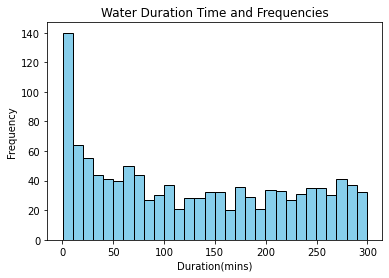

In [22]:
x = water_dataset['Duration(mins)']

plt.hist(x, bins = 30, color ='skyblue', edgecolor='black')
plt.xlabel('Duration(mins)')
plt.ylabel('Frequency')
plt.title('Water Duration Time and Frequencies')
plt.show()
#duration_outlier = px.histogram(water_dataset, x='Duration(mins)')
#duration_outlier.show()

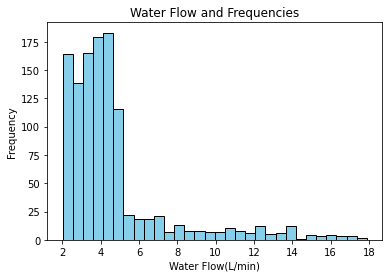

In [23]:
x = water_dataset['Water Flow(L/min)']

plt.hist(x, bins = 30, color = 'skyblue', edgecolor='black')
plt.xlabel('Water Flow(L/min)')
plt.ylabel('Frequency')
plt.title('Water Flow and Frequencies')
plt.show()

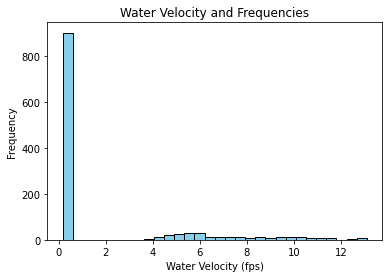

In [26]:
x = water_dataset['Water Velocity (fps)']

plt.hist(x, bins = 30, color = 'skyblue', edgecolor='black')
plt.xlabel('Water Velocity (fps)')
plt.ylabel('Frequency')
plt.title('Water Velocity and Frequencies')
plt.show()

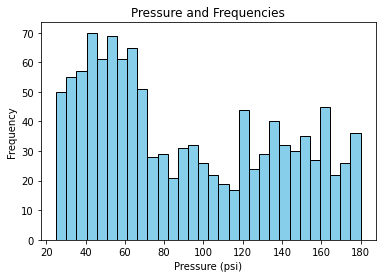

In [28]:
x = water_dataset['Pressure (psi)']

plt.hist(x, bins = 30, color = 'skyblue', edgecolor='black')
plt.xlabel('Pressure (psi)')
plt.ylabel('Frequency')
plt.title('Pressure and Frequencies')
plt.show()

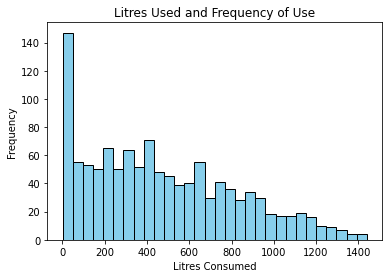

In [30]:
x = water_dataset['Litres Used']

plt.hist(x, bins = 30, color = 'skyblue', edgecolor='black')
plt.xlabel('Litres Consumed')
plt.ylabel('Frequency')
plt.title('Litres Used and Frequency of Use')
plt.show()

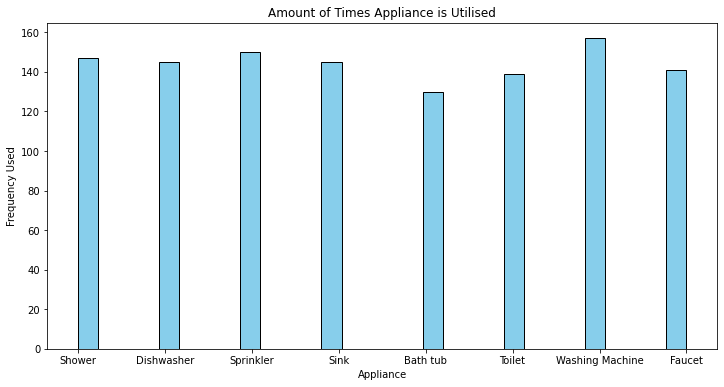

In [32]:
x = water_dataset['Appliance']

plt.figure(figsize=(12, 6))
plt.hist(x, bins = 30, color = 'skyblue', edgecolor='black')
plt.xlabel('Appliance')
plt.ylabel('Frequency Used')
plt.title('Amount of Times Appliance is Utilised')
plt.show()

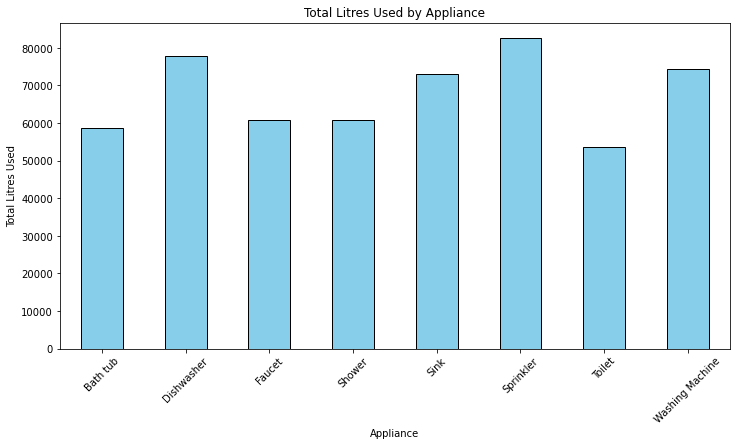

In [34]:
appliance_litres = water_dataset.groupby('Appliance')['Litres Used'].sum()

plt.figure(figsize=(12, 6))
appliance_litres.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Litres Used by Appliance')
plt.xlabel('Appliance')
plt.ylabel('Total Litres Used')
plt.xticks(rotation=45)
plt.show()

Exploring the relationship between pressure, flow and velocity water dynamic in the dataset

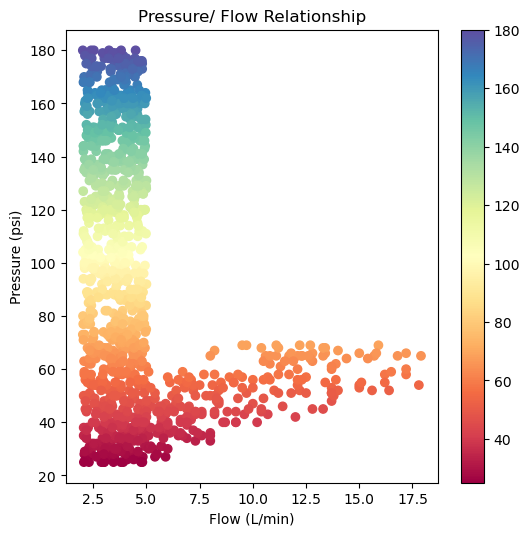

In [415]:
x = water_dataset['Water Flow(L/min)']
y = water_dataset['Pressure (psi)']
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap = 'Spectral')
plt.colorbar()
plt.title('Pressure/ Flow Relationship')
plt.xlabel('Flow (L/min)')
plt.ylabel('Pressure (psi)')
plt.show()

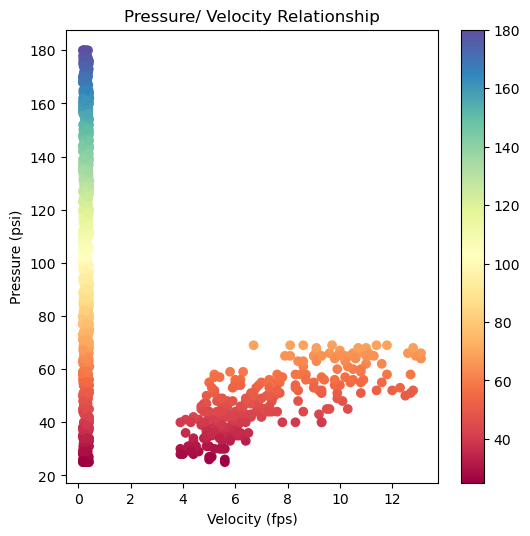

In [417]:
x = water_dataset['Water Velocity (fps)']
y = water_dataset['Pressure (psi)']
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap = 'Spectral')
plt.colorbar()
plt.title('Pressure/ Velocity Relationship')
plt.xlabel('Velocity (fps)')
plt.ylabel('Pressure (psi)')
plt.show()

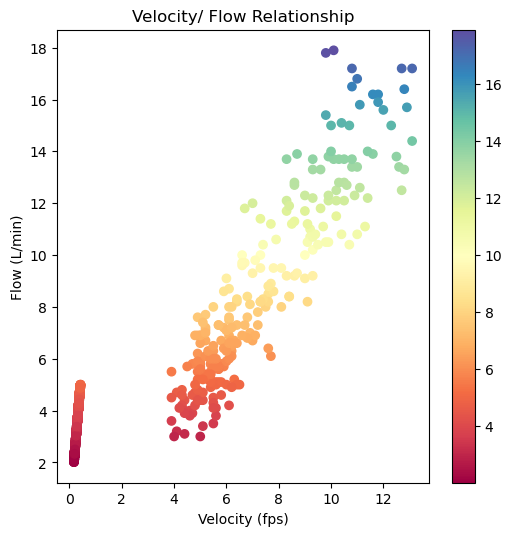

In [419]:
x = water_dataset['Water Velocity (fps)']
y = water_dataset['Water Flow(L/min)']
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap = 'Spectral')
plt.colorbar()
plt.title('Velocity/ Flow Relationship')
plt.xlabel('Velocity (fps)')
plt.ylabel('Flow (L/min)')
plt.show()

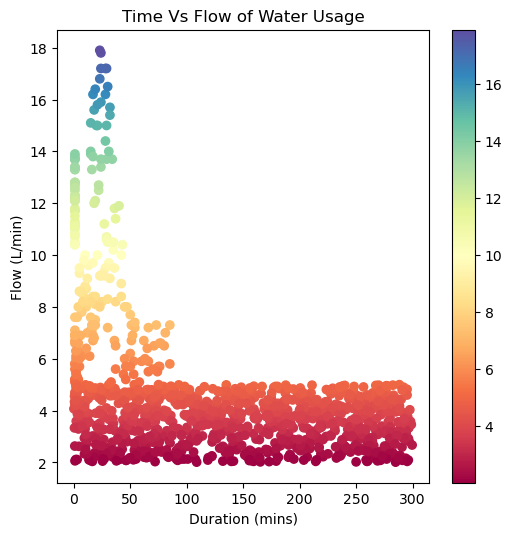

In [421]:
x = water_dataset['Duration(mins)']
y = water_dataset['Water Flow(L/min)']
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap = 'Spectral')
plt.colorbar()
plt.title('Time Vs Flow of Water Usage')
plt.xlabel('Duration (mins)')
plt.ylabel('Flow (L/min)')
plt.show()

## Observations

What can be observed from the patterns and water dynamic relationship in the dataset?

## Data Analysis

What could be considered normal thresholds and criterias to detect possible leakage in a dataset?

In [45]:
def detect_possible_leak(row):
    SUSPICIOUS_CRITERIA = {
        'min_duration': 180, 
        'low_flow_threshold': 3.785,
        'start_inactive_hours': 0,
        'end_inactive_hours': 3,
    }
    
    # Check duration and flow
    if(row['Duration(mins)'] > SUSPICIOUS_CRITERIA['min_duration'] and
       row['Water Flow(L/min)'] < SUSPICIOUS_CRITERIA['low_flow_threshold']):
        return 'Long duration with low flow'
    
    # Check inactive-hours
    hour = pd.to_datetime(row['Start Time']).hour
    if(hour >= SUSPICIOUS_CRITERIA['start_inactive_hours'] and 
       hour <= SUSPICIOUS_CRITERIA['end_inactive_hours'] and
       row['Water Flow(L/min)'] > 0):
        return 'Off-hours usage'
        
    #Define water demand appliance thresholds
    thresholds = {
        'Shower': {'duration': 45, 'flow': 10, 'litres': 150},
        'Dishwasher': {'duration': 180, 'flow': 5, 'litres': 75}, 
        'Sprinkler': {'duration': 60, 'flow': 12, 'litres': 300}, 
        'Sink': {'duration': 15, 'flow': 6, 'litres': 30}, 
        'Bath tub': {'duration': 30, 'flow': 8, 'litres': 160},
        'Toilet': {'duration': 5, 'flow': 6, 'litres': 12},
        'Washing Machine': {'duration': 180, 'flow': 7, 'litres': 100},
        'Faucet': {'duration': 10, 'flow': 6, 'litres': 20} 
    }
    
    appliance = row['Appliance']
    if appliance in thresholds:
        if(row['Duration(mins)'] > thresholds[appliance]['duration'] * 2 or 
           row['Water Flow(L/min)'] > thresholds[appliance]['flow'] * 1.5 or
           row['Litres Used'] > thresholds[appliance]['litres'] * 3):
            return 'High Usage Consumption'
    
    return 'Normal Usage'
    
def detect_pressure_flow_leak(row):
    pressure_thresh = {
        'Shower': {'pressure':60,'duration': 45, 'flow': 10}, 
        'Dishwasher': {'pressure':50,'duration': 180, 'flow': 5},
        'Sprinkler': {'pressure':55,'duration': 60, 'flow': 12}, 
        'Sink': {'pressure':45,'duration': 15, 'flow': 6}, 
        'Bath tub': {'pressure':50,'duration': 30, 'flow': 8}, 
        'Toilet': {'pressure':45,'duration': 5, 'flow': 6}, 
        'Washing Machine': {'pressure':50,'duration': 180, 'flow':7}, 
        'Faucet': {'pressure':45,'duration': 10, 'flow': 6} 
    }
    pressure = row['Pressure (psi)']
    flow = row['Water Flow(L/min)']
    appliance = row['Appliance']
    
    if appliance in pressure_thresh:
        normal_p = pressure_thresh[appliance]['pressure']
        normal_f = pressure_thresh[appliance]['flow']
        
        pressure_dev = (pressure - normal_p)/ normal_p *100
        flow_dev = (flow - normal_f)/normal_f *100
        
        efficiency_ratio = flow / pressure
        expected_ratio = normal_f / normal_p
        ratio_deviation = abs(efficiency_ratio - expected_ratio) / expected_ratio * 100
        
        if pressure_dev > 30 and flow_dev > 30:
            return {
                'status': 'Severe Leak',
                'pressure_dev': f"{pressure_dev:.1f}%",
                'flow_dev': f"{flow_dev:.1f}%",
                'ratio_dev': f"{ratio_deviation:.1f}%",
                'details': 'High pressure and flow indicating major leak'
            }
        elif (pressure_dev > 20 and flow_dev > 15) or (pressure_dev > 15 and flow_dev > 20):
            return {
                'status': 'Moderate Leak',
                'pressure_dev': f"{pressure_dev:.1f}%",
                'flow_dev': f"{flow_dev:.1f}%",
                'ratio_dev': f"{ratio_deviation:.1f}%",
                'details': 'Elevated pressure and flow indicating possible leak'
            }
        elif pressure_dev > 10 and flow_dev > 10:
            return {
                'status': 'Minor Leak',
                'pressure_dev': f"{pressure_dev:.1f}%",
                'flow_dev': f"{flow_dev:.1f}%",
                'ratio_dev': f"{ratio_deviation:.1f}%",
                'details': 'Slight elevation in pressure and flow'
            }
        
        return {
            'status': 'Normal',
            'pressure_dev': f"{pressure_dev:.1f}%",
            'flow_dev': f"{flow_dev:.1f}%",
            'ratio_dev': f"{ratio_deviation:.1f}%",
            'details': 'Normal pressure and flow relationship'
        }
    
    return {
        'status': 'Unknown',
        'pressure_dev': 'N/A',
        'flow_dev': 'N/A',
        'ratio_dev': 'N/A',
        'details': 'Appliance not in threshold database'
    }


water_dataset['Usage'] = water_dataset.apply(detect_possible_leak, axis=1)
results = water_dataset.apply(detect_pressure_flow_leak, axis=1)
water_dataset['Leak_Status'] = results.apply(lambda x: x['status'])
water_dataset['Pressure_Deviation'] = results.apply(lambda x: x['pressure_dev'])
water_dataset['Flow_Deviation'] = results.apply(lambda x: x['flow_dev'])
water_dataset['Efficiency_Ratio_Deviation'] = results.apply(lambda x: x['ratio_dev'])
water_dataset['Analysis_Details'] = results.apply(lambda x: x['details'])

In [47]:
water_dataset

Appliance          Start Time            End Time  Duration(mins)  \
0              Shower 2024-10-05 22:56:19 2024-10-06 02:39:01      222.704454   
1          Dishwasher 2024-10-05 23:04:39 2024-10-06 00:37:06       92.451849   
2              Shower 2024-10-05 23:13:00 2024-10-06 03:45:11      272.188777   
3           Sprinkler 2024-10-05 23:21:20 2024-10-06 00:31:16       69.934732   
4                Sink 2024-10-05 23:29:40 2024-10-06 03:08:05      218.421035   
...               ...                 ...                 ...             ...   
1149  Washing Machine 2025-02-05 22:35:00 2025-02-05 23:21:00       46.000000   
1150           Toilet 2025-02-05 00:49:00 2025-02-05 00:50:00        1.000000   
1151        Sprinkler 2025-02-05 16:58:00 2025-02-05 17:25:00       27.000000   
1152       Dishwasher 2025-02-05 04:53:00 2025-02-05 06:03:00       70.000000   
1153  Washing Machine 2025-02-05 09:46:00 2025-02-05 11:03:00       77.000000   

      Water Flow(L/min)  Water Velocity (fps)  Pressure (psi)  Litres Used  \
0              3.927656              0.327305              31       874.69   
1              3.304768              0.275397              60       305.53   
2              4.573624              0.381135             156      1244.86   
3              3.045549              0.253796             119       212.99   
4              3.605011              0.300418             114       787.39   
...                 ...                   ...             ...          ...   
1149           5.200000              5.100000              53       237.30   
1150          12.100000             10.500000              56        12.10   
1151           9.200000              9.300000              40       247.50   
1152           5.600000              5.000000              44       389.20   
1153           6.600000              6.400000              40       506.90   

      Member                        Usage    Leak_Status Pressure_Deviation  \
0     User 4       High Usage Consumption         Normal             -48.3%   
1     User 1       High Usage Consumption         Normal              20.0%   
2     User 1       High Usage Consumption         Normal             160.0%   
3     User 1                 Normal Usage         Normal             116.4%   
4     User 2  Long duration with low flow         Normal             153.3%   
...      ...                          ...            ...                ...   
1149  User 1                 Normal Usage         Normal               6.0%   
1150  User 2              Off-hours usage  Moderate Leak              24.4%   
1151  User 3                 Normal Usage         Normal             -27.3%   
1152  User 4       High Usage Consumption         Normal             -12.0%   
1153  User 2       High Usage Consumption         Normal             -20.0%   

     Flow_Deviation Efficiency_Ratio_Deviation  \
0            -60.7%                      24.0%   
1            -33.9%                      44.9%   
2            -54.3%                      82.4%   
3            -74.6%                      88.3%   
4            -39.9%                      76.3%   
...             ...                        ...   
1149         -25.7%                      29.9%   
1150         101.7%                      62.1%   
1151         -23.3%                       5.4%   
1152          12.0%                      27.3%   
1153          -5.7%                      17.9%   

                                       Analysis_Details  
0                 Normal pressure and flow relationship  
1                 Normal pressure and flow relationship  
2                 Normal pressure and flow relationship  
3                 Normal pressure and flow relationship  
4                 Normal pressure and flow relationship  
...                                                 ...  
1149              Normal pressure and flow relationship  
1150  Elevated pressure and flow indicating possible...  
1151              Normal press

In [49]:
usage_count= px.histogram(water_dataset, x='Usage')
usage_count.show()

In [50]:
leakage_count= px.histogram(water_dataset, x='Leak_Status')
leakage_count.show()

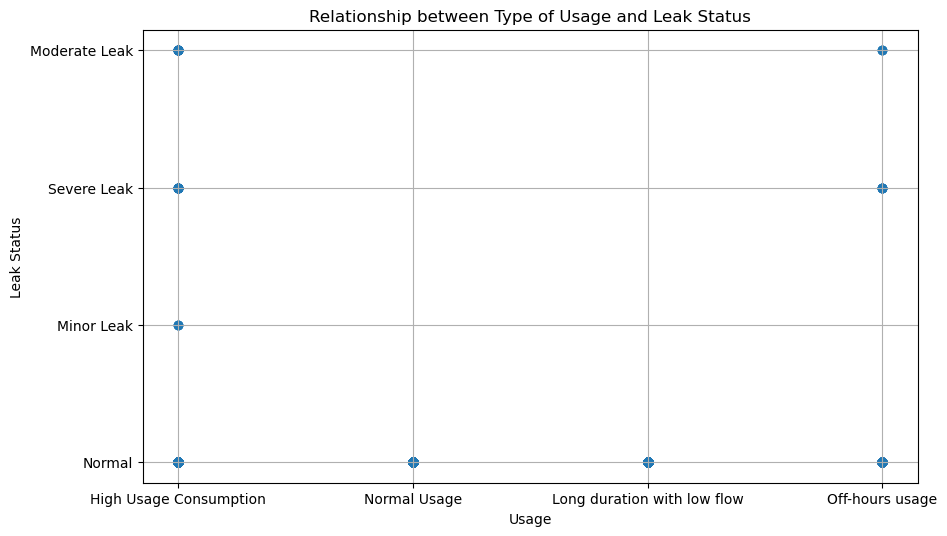

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(water_dataset['Usage'], water_dataset['Leak_Status'])
plt.title('Relationship between Type of Usage and Leak Status')
plt.xlabel('Usage')
plt.ylabel('Leak Status')
plt.grid(True)
plt.show()

This confirms that high usage consumption cathers for both normal, minor, moderate and several leak conditions in a household.

### Data Pre-processing

In [53]:
water_dataset['Duration(mins)'] = water_dataset['Duration(mins)'].round(2)
water_dataset['Water Flow(L/min)'] = water_dataset['Water Flow(L/min)'].round(2)
water_dataset['Water Velocity (fps)'] = water_dataset['Water Velocity (fps)'].round(2)
water_dataset['Pressure (psi)'] = water_dataset['Pressure (psi)'].round(2)
water_dataset['Litres Used'] = water_dataset['Litres Used'].round(2)

In [54]:
water_dataset['Member'] = water_dataset['Member'].map({'User 1':1, 'User 2':2, 'User 3':3,
                                                       'User 4':4})

In [55]:
water_dataset['Appliance'] = water_dataset['Appliance'].map({'Sink':0, 'Toilet':1, 'Faucet':2,
                                                             'Shower':3, 'Bath tub':4, 'Washing Machine':5,
                                                             'Dishwasher':6, 'Sprinkler':7})

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder = LabelEncoder()
leak_mapping = {'Normal':0, 'Minor Leak':1, 'Moderate Leak':1, 'Severe Leak':1}
water_dataset['Leak_Status'] = water_dataset['Leak_Status'].map(leak_mapping)
water_dataset['Leak_Status'] = encoder.fit_transform(water_dataset['Leak_Status'])

In [ ]:
hotencoder = OneHotEncoder()
usage_mapping = {'Normal Usage': 0, 'Off-hours usage': 1, 
                 'Long duration with low flow': 2, 'High Usage Consumption': 4}
water_dataset['Usage'] = water_dataset['Usage'].map(usage_mapping)
water_dataset['Usage'] = hotencoder.fit_transform(water_dataset['Usage'])

In [ ]:
analysis_mapping = {'Normal pressure and flow relationship':0, 'Slight elevation in pressure and flow':1, 
                    'Elevated pressure and flow indicating possible leak':2, 'High pressure and flow indicating major leak':3}
water_dataset['Analysis_Details'] = water_dataset['Analysis_Details'].map(analysis_mapping)
water_dataset['Analysis_Details'] = hotencoder.fit_transform(water_dataset['Analysis_Details'])

In [423]:
water_dataset.drop(['Start Time', 'End Time'], axis=1, inplace = True)

In [425]:
water_dataset

Appliance  Duration(mins)  Water Flow(L/min)  Water Velocity (fps)  \
0             3          222.70               3.93                  0.33   
1             6           92.45               3.30                  0.28   
2             3          272.19               4.57                  0.38   
3             7           69.93               3.05                  0.25   
4             0          218.42               3.61                  0.30   
...         ...             ...                ...                   ...   
1149          5           46.00               5.20                  5.10   
1150          1            1.00              12.10                 10.50   
1151          7           27.00               9.20                  9.30   
1152          6           70.00               5.60                  5.00   
1153          5           77.00               6.60                  6.40   

      Pressure (psi)  Litres Used  Member  Usage  Leak_Status  \
0                 31       874.69       4      4            0   
1                 60       305.53       1      4            0   
2                156      1244.86       1      4            0   
3                119       212.99       1      0            0   
4                114       787.39       2      2            0   
...              ...          ...     ...    ...          ...   
1149              53       237.30       1      0            0   
1150              56        12.10       2      1            1   
1151              40       247.50       3      0            0   
1152              44       389.20       4      4            0   
1153              40       506.90       2      4            0   

     Pressure_Deviation Flow_Deviation Efficiency_Ratio_Deviation  \
0                -48.3%         -60.7%                      24.0%   
1                 20.0%         -33.9%                      44.9%   
2                160.0%         -54.3%                      82.4%   
3                116.4%         -74.6%                      88.3%   
4                153.3%         -39.9%                      76.3%   
...                 ...            ...                        ...   
1149               6.0%         -25.7%                      29.9%   
1150              24.4%         101.7%                      62.1%   
1151             -27.3%         -23.3%                       5.4%   
1152             -12.0%          12.0%                      27.3%   
1153             -20.0%          -5.7%                      17.9%   

      Analysis_Details  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1149                 0  
1150                 2  
1151                 0  
1152                 0  
1153                 0  

[1154 rows x 13 columns]

In [74]:
#water_dataset.to_excel('water_usage_and_leak_detect.xlsx', index=False)

In [6]:
leakage_data = pd.read_excel('water_usage_and_leak_detect.xlsx')

## Feature Selection

Selecting of relevant features that corresponds to leakage in dataset

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [10]:
correlation = leakage_data.corr()

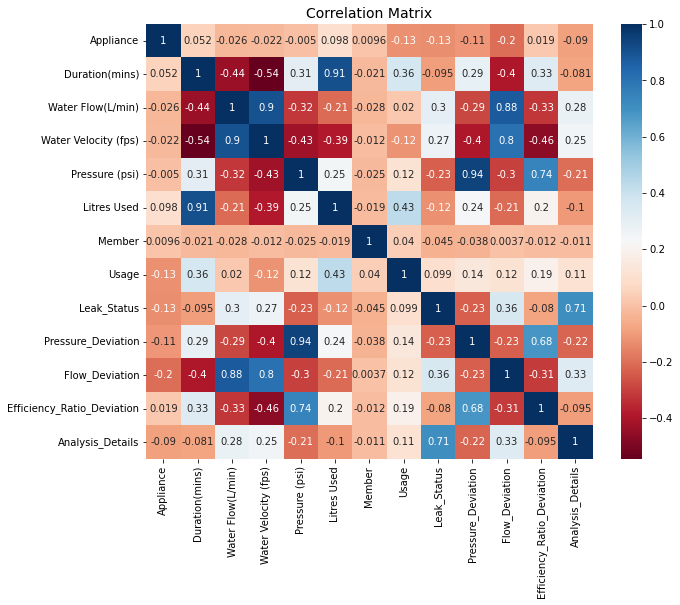

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='RdBu')
plt.title('Correlation Matrix', fontsize=14)
plt.yticks(rotation=0)
plt.show()

In [15]:
x = leakage_data.drop('Leak_Status', axis=1).values

In [17]:
y = leakage_data['Leak_Status'].values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state=42, stratify=y)

In [21]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

kf=KFold(n_splits=5,shuffle=True, random_state=42)

lasso = Lasso()

lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(x, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [23]:
col_names = leakage_data.drop('Leak_Status', axis=1).columns
print("Column Names: {}".format(col_names.values))

Column Names: ['Appliance' 'Duration(mins)' 'Water Flow(L/min)' 'Water Velocity (fps)'
 'Pressure (psi)' 'Litres Used' 'Member' 'Usage' 'Pressure_Deviation'
 'Flow_Deviation' 'Efficiency_Ratio_Deviation' 'Analysis_Details']


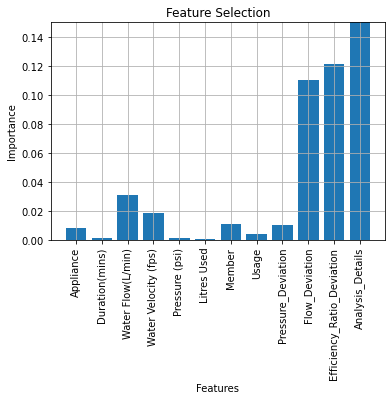

In [25]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(x_train, y_train)
lasso1_coef = np.abs(lasso1.coef_)
plt.bar(col_names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [27]:
feature_subset=np.array(col_names)[lasso1_coef>0.001]
print("Selected Feature Columns: {}".format(feature_subset))
 
feature_subset=np.append(feature_subset, 'Leak_Status')
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['Appliance' 'Duration(mins)' 'Water Flow(L/min)' 'Water Velocity (fps)'
 'Pressure (psi)' 'Member' 'Usage' 'Pressure_Deviation' 'Flow_Deviation'
 'Efficiency_Ratio_Deviation' 'Analysis_Details']
Selected Columns: ['Appliance' 'Duration(mins)' 'Water Flow(L/min)' 'Water Velocity (fps)'
 'Pressure (psi)' 'Member' 'Usage' 'Pressure_Deviation' 'Flow_Deviation'
 'Efficiency_Ratio_Deviation' 'Analysis_Details' 'Leak_Status']


In [29]:
features = leakage_data[feature_subset]
print(features.head())

   Appliance  Duration(mins)  Water Flow(L/min)  Water Velocity (fps)  \
0          3          222.70               3.93                  0.33   
1          6           92.45               3.30                  0.28   
2          3          272.19               4.57                  0.38   
3          7           69.93               3.05                  0.25   
4          0          218.42               3.61                  0.30   

   Pressure (psi)  Member  Usage  Pressure_Deviation  Flow_Deviation  \
0              31       4      4              -0.483          -0.607   
1              60       1      4               0.200          -0.339   
2             156       1      4               1.600          -0.543   
3             119       1      0               1.164          -0.746   
4             114       2      2               1.533          -0.399   

   Efficiency_Ratio_Deviation  Analysis_Details  Leak_Status  
0                       0.240                 0            0  
1 

Showes dataset's best features

## Testing and Evaluating of Models in Detecting Leakage


### Unsupervised ML Model (KMeans)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [43]:
scaler = StandardScaler()

In [455]:
leakage_data_std: np.ndarray = scaler.fit_transform(leakage_data)

In [457]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [459]:
hier_clust = linkage(leakage_data_std, method ='ward')

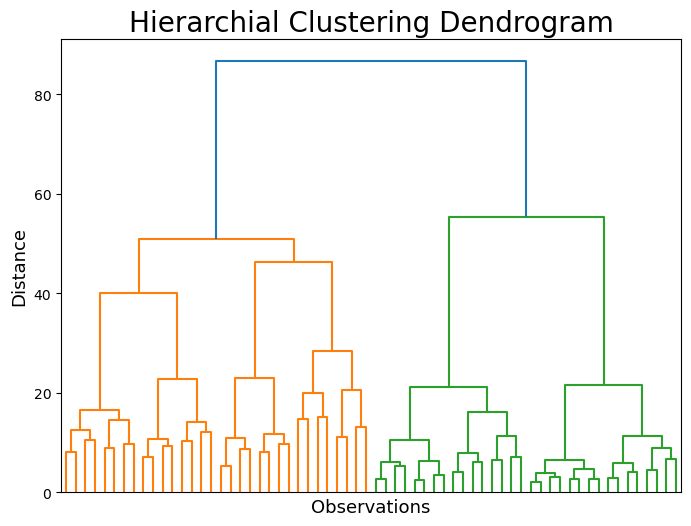

In [460]:
plt.figure(figsize=(8,6))
plt.title('Hierarchial Clustering Dendrogram', fontsize=20)
plt.ylabel('Distance', fontsize=13)
plt.xlabel('Observations', fontsize=13)
dendrogram(hier_clust, show_leaf_counts=False, truncate_mode='level',
          p=5, no_labels=True)
plt.show()

Displays good number of clusters is equal to 4 clusters in dataset

In [463]:
wcss = {}
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(leakage_data_std)
    wcss[i] = kmeans.inertia_

Text(0.5, 1.0, 'K-means Clustering - Elbow Method')

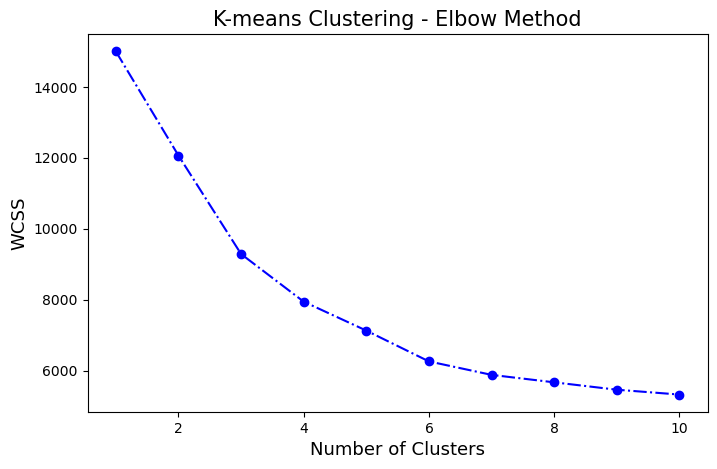

In [464]:
plt.figure(figsize=(8,5))
plt.plot(list(wcss.keys()), list(wcss.values()), marker='o', linestyle='-.',
        color='blue')
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.title('K-means Clustering - Elbow Method', fontsize=15)

In [467]:
from kneed import KneeLocator
x1, y = list(wcss.keys()), list(wcss.values())
kn = KneeLocator(x1, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

The optimal number of clusters, suggested by Elbow criterion:  4


In [469]:
kmeans = KMeans(n_clusters=4, max_iter = 500, init='k-means++', random_state=42)

In [471]:
kmeans.fit(leakage_data_std)

KMeans(max_iter=500, n_clusters=4, random_state=42)

In [473]:
leakage_segment = leakage_data.copy()

In [475]:
leakage_segment['Segment K-means'] = kmeans.labels_
leakage_segment['Segment K-means'].replace({0: "A", 1: "B", 2:"C", 3:"D"}, inplace=True)

In [477]:
leakage_segm_analysis = leakage_segment.groupby(['Segment K-means']).mean()
leakage_segm_analysis

Appliance  Duration(mins)  Water Flow(L/min)  \
Segment K-means                                                 
A                 3.408696      180.505913           3.602348   
B                 2.333333       11.013889          13.431944   
C                 3.519427      154.603824           3.444519   
D                 4.125000       30.660484           5.875242   

                 Water Velocity (fps)  Pressure (psi)  Litres Used    Member  \
Segment K-means                                                                
A                            0.310261       62.228986   653.712377  2.649275   
B                           10.469444       59.416667   165.291667  2.347222   
C                            0.287035      138.116564   535.721452  2.496933   
D                            4.500242       46.754032   169.782540  2.608871   

                    Usage  Leak_Status  Pressure_Deviation  Flow_Deviation  \
Segment K-means                                                              
A                3.060870     0.249275            0.179009       -0.461797   
B                3.416667     0.777778            0.261153        0.959028   
C                2.431493     0.010225            1.791378       -0.505378   
D                0.830645     0.016129           -0.089387       -0.218891   

                 Efficiency_Ratio_Deviation  Analysis_Details  
Segment K-means                                                
A                                  0.545499          0.573913  
B                                  0.576819          1.902778  
C                                  0.821667          0.036810  
D                                  0.290952          0.048387

In [479]:
leakage_segm_analysis['N_Obs'] = leakage_segment[['Segment K-means', 'Leak_Status']].groupby(['Segment K-means'])['Leak_Status'].count()

# Calculate the proportion of observations
leakage_segm_analysis['Prop_Obs'] = leakage_segm_analysis.N_Obs / leakage_segm_analysis.N_Obs.sum()

# Display the updated DataFrame
leakage_segm_analysis

Appliance  Duration(mins)  Water Flow(L/min)  \
Segment K-means                                                 
A                 3.408696      180.505913           3.602348   
B                 2.333333       11.013889          13.431944   
C                 3.519427      154.603824           3.444519   
D                 4.125000       30.660484           5.875242   

                 Water Velocity (fps)  Pressure (psi)  Litres Used    Member  \
Segment K-means                                                                
A                            0.310261       62.228986   653.712377  2.649275   
B                           10.469444       59.416667   165.291667  2.347222   
C                            0.287035      138.116564   535.721452  2.496933   
D                            4.500242       46.754032   169.782540  2.608871   

                    Usage  Leak_Status  Pressure_Deviation  Flow_Deviation  \
Segment K-means                                                              
A                3.060870     0.249275            0.179009       -0.461797   
B                3.416667     0.777778            0.261153        0.959028   
C                2.431493     0.010225            1.791378       -0.505378   
D                0.830645     0.016129           -0.089387       -0.218891   

                 Efficiency_Ratio_Deviation  Analysis_Details  N_Obs  Prop_Obs  
Segment K-means                                                                 
A                                  0.545499          0.573913    345  0.298960  
B                                  0.576819          1.902778     72  0.062392  
C                                  0.821667          0.036810    489  0.423744  
D                                  0.290952          0.048387    248  0.214905

In [481]:
leakage_segm_analysis.rename({'A':'Possible Leakage: High Usage Consumption', 'B':'Leakage', 
                              'C':'Possible Leakage:Long Duration/Low Flow', 'D':'Normal Usage'},
                           inplace = True)

In [483]:
leakage_segment['Labels'] = leakage_segment['Segment K-means'].map({'A':'Possible Leakage: High Usage Consumption', 'B':'Leakage', 
                              'C':'Possible Leakage:Long Duration/Low Flow', 'D':'Normal Usage'})

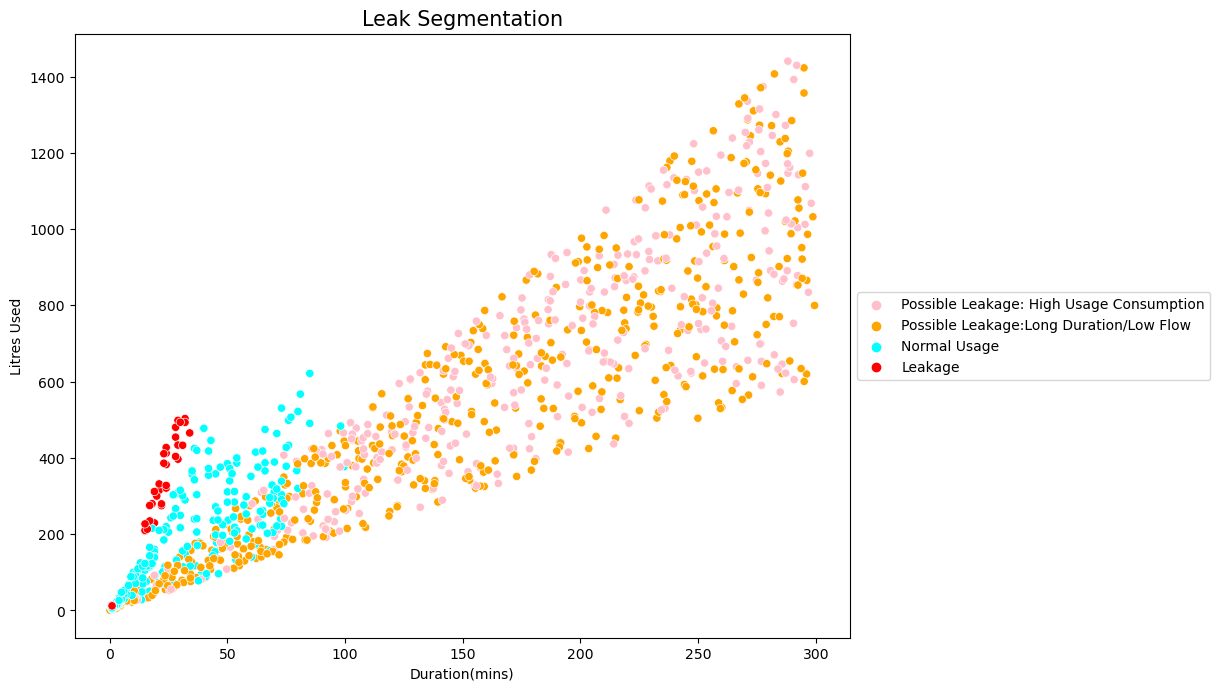

In [503]:
x_axis = leakage_segment['Duration(mins)']
y_axis = leakage_segment['Litres Used']

colors = ['pink', 'orange', 'cyan', 'red']

plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = leakage_segment.Labels, palette =colors)
plt.title('Leak Segmentation', fontsize = 15)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

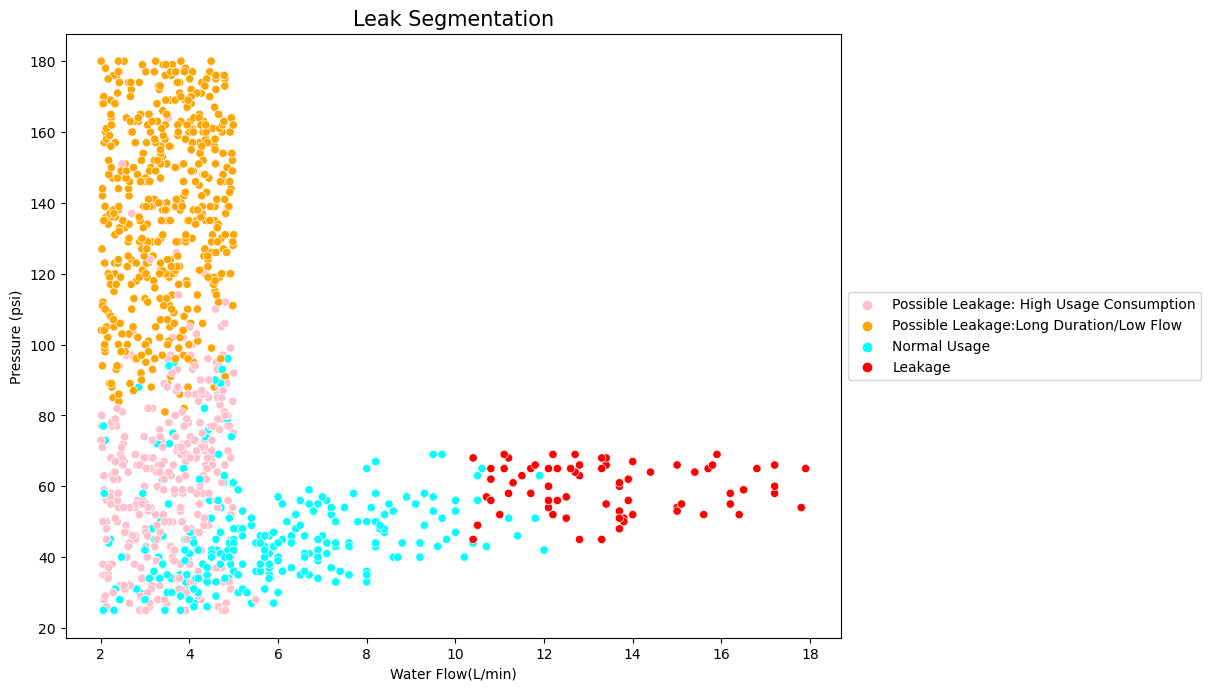

In [511]:
x_axis = leakage_segment['Water Flow(L/min)']
y_axis = leakage_segment['Pressure (psi)']

colors = ['pink', 'orange', 'cyan', 'red']

plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = leakage_segment.Labels, palette =colors)
plt.title('Leak Segmentation', fontsize = 15)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

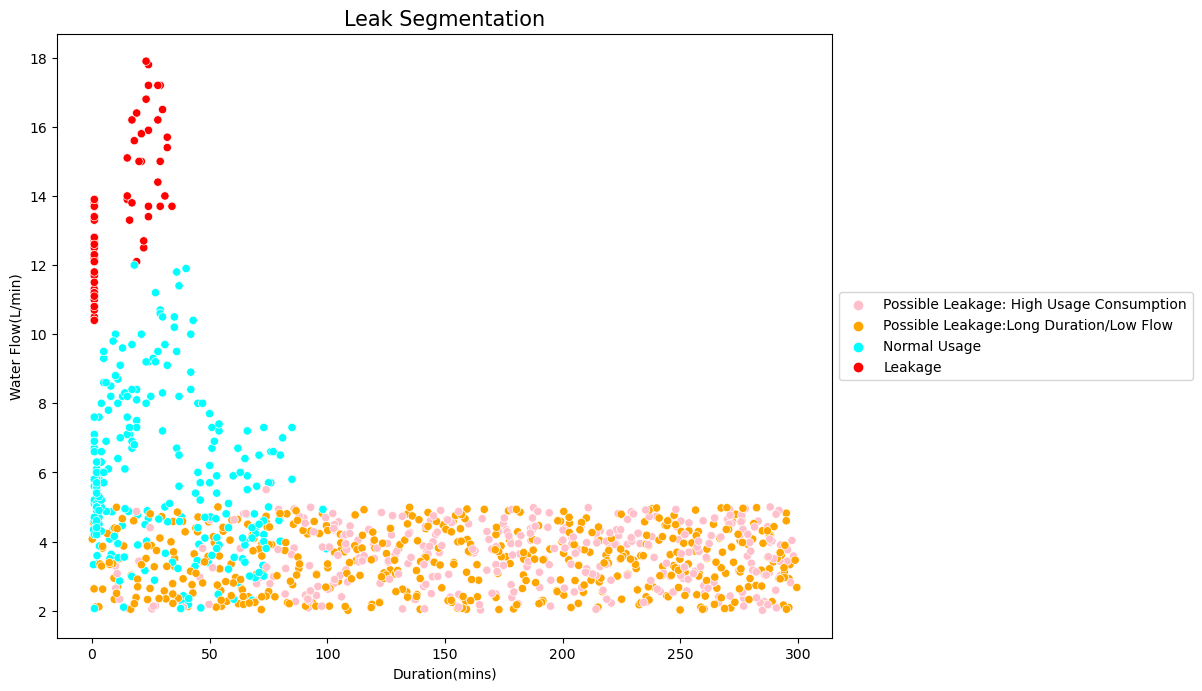

In [513]:
x_axis = leakage_segment['Duration(mins)']
y_axis = leakage_segment['Water Flow(L/min)']

colors = ['pink', 'orange', 'cyan', 'red']

plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = leakage_segment.Labels, palette =colors)
plt.title('Leak Segmentation', fontsize = 15)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

In [505]:
from sklearn.metrics import silhouette_score

In [507]:
cluster_labels = leakage_segment.Labels

In [509]:
silhouette_avg = silhouette_score(leakage_data_std, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.23491887419646984


### Supervised ML Models

### Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [34]:
x = features.drop('Leak_Status', axis=1)
y = leakage_data['Leak_Status']

In [45]:
x = scaler.fit_transform(x)

In [47]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)

In [49]:
rf_model = RandomForestClassifier()

In [51]:
rf_model.fit(x_train1, y_train1)

RandomForestClassifier()

In [53]:
rf_pred = rf_model.predict(x_test1)

In [152]:
rf_accuracy = accuracy_score(y_test1, rf_pred)
rf_f1score = f1_score(y_test1, rf_pred)
rf_recall = recall_score(y_test1, rf_pred)
rf_precision = precision_score(y_test1, rf_pred)
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"F1 Score: {rf_f1score:.2f}")
print(f"Recall Score: {rf_recall:.2f}")
print(f"Precision: {rf_precision:.2f}")

Accuracy: 0.95
F1 Score: 0.76
Recall Score: 0.69
Precision: 0.84


In [67]:
print("\nClassification Report:\n", classification_report(y_test1, rf_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       308
           1       0.84      0.69      0.76        39

    accuracy                           0.95       347
   macro avg       0.90      0.84      0.87       347
weighted avg       0.95      0.95      0.95       347



In [134]:
print("Confusion Matrix:\n", confusion_matrix(y_test1, rf_pred))

Confusion Matrix:
 [[303   5]
 [ 12  27]]


In [69]:
rf_cm = confusion_matrix(y_test1, rf_pred)
rf_TP = rf_cm[1, 1]
rf_TN = rf_cm[0, 0]
rf_FP = rf_cm[0, 1]
rf_FN = rf_cm[1, 0]

### Naive Bayes Model

In [71]:
nb_model = GaussianNB()

In [73]:
nb_model.fit(x_train1, y_train1)

GaussianNB()

In [75]:
nb_pred = nb_model.predict(x_test1)

In [154]:
nb_accuracy = accuracy_score(y_test1, nb_pred)
nb_f1score = f1_score(y_test1, nb_pred)
nb_recall = recall_score(y_test1, nb_pred)
nb_precision = precision_score(y_test1, nb_pred)
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"F1 Score: {nb_f1score:.2f}")
print(f"Recall Score: {nb_recall:.2f}")
print(f"Precision: {nb_precision:.2f}")

Accuracy: 0.92
F1 Score: 0.66
Recall Score: 0.69
Precision: 0.63


In [79]:
print("\nClassification Report:\n", classification_report(y_test1, nb_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       308
           1       0.63      0.69      0.66        39

    accuracy                           0.92       347
   macro avg       0.79      0.82      0.81       347
weighted avg       0.92      0.92      0.92       347



In [83]:
print("Confusion Matrix:\n", confusion_matrix(y_test1, nb_pred))

Confusion Matrix:
 [[292  16]
 [ 12  27]]


In [81]:
nb_cm = confusion_matrix(y_test1, nb_pred)
nb_TP = nb_cm[1, 1]
nb_TN = nb_cm[0, 0]
nb_FP = nb_cm[0, 1]
nb_FN = nb_cm[1, 0]

### Logistic Regression

In [123]:
lr_model = LogisticRegression()

In [125]:
lr_model.fit(x_train1, y_train1)

LogisticRegression()

In [127]:
log_pred = lr_model.predict(x_test1)

In [156]:
log_accuracy = accuracy_score(y_test1, log_pred)
lr_f1score = f1_score(y_test1, log_pred)
lr_recall = recall_score(y_test1, log_pred)
lr_precision = precision_score(y_test1, log_pred)
print(f"Accuracy: {log_accuracy:.2f}")
print(f"F1 Score: {lr_f1score:.2f}")
print(f"Recall Score: {lr_recall:.2f}")
print(f"Precision: {lr_precision:.2f}")

Accuracy: 0.94
F1 Score: 0.71
Recall Score: 0.64
Precision: 0.81


In [131]:
print("\nClassification Report:\n", classification_report(y_test1, log_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       308
           1       0.81      0.64      0.71        39

    accuracy                           0.94       347
   macro avg       0.88      0.81      0.84       347
weighted avg       0.94      0.94      0.94       347



In [136]:
print("Confusion Matrix:\n", confusion_matrix(y_test1, log_pred))

Confusion Matrix:
 [[302   6]
 [ 14  25]]


In [138]:
lr_cm = confusion_matrix(y_test1, log_pred)
lr_TP = lr_cm[1, 1]
lr_TN = lr_cm[0, 0]
lr_FP = lr_cm[0, 1]
lr_FN = lr_cm[1, 0]

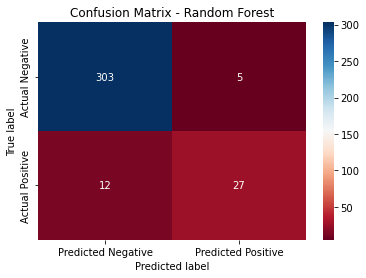

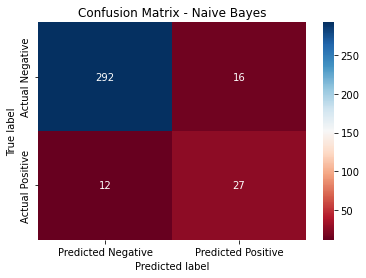

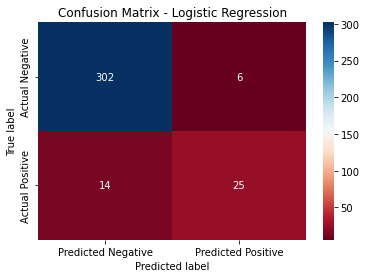

In [160]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='RdBu', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

plot_confusion_matrix(rf_cm, 'Random Forest')
plot_confusion_matrix(nb_cm, 'Naive Bayes')
plot_confusion_matrix(lr_cm, 'Logistic Regression')

In [142]:
rf_acc = (rf_TP + rf_TN) / (rf_TP + rf_TN + rf_FP + rf_FN)
print("Random Forest Accuracy Score:", rf_acc)

Random Forest Accuracy Score: 0.9510086455331412


In [144]:
nb_acc = (nb_TP + nb_TN) / (nb_TP + nb_TN + nb_FP + nb_FN)
print("Naive Bayes Accuracy Score:", nb_acc)

Naive Bayes Accuracy Score: 0.9193083573487032


In [146]:
lr_acc = (lr_TP + lr_TN) / (lr_TP + lr_TN + lr_FP + lr_FN)
print("Logistic Regression Accuracy Score:", lr_acc)

Logistic Regression Accuracy Score: 0.9423631123919308


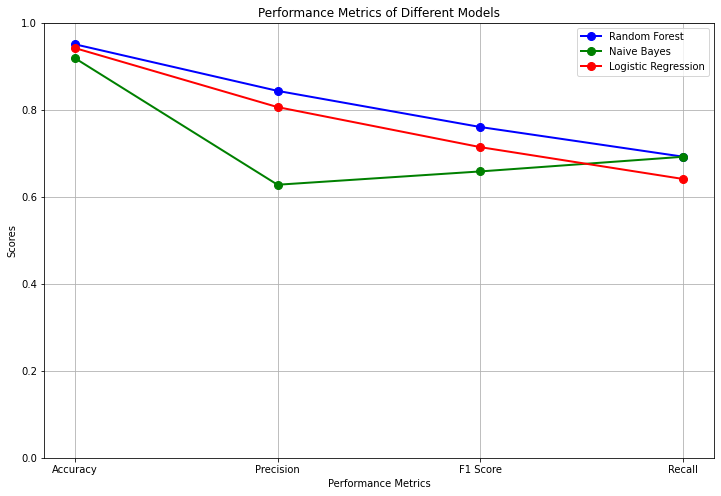

In [158]:
rf_scores = [rf_acc, rf_precision, rf_f1score, rf_recall]  
nb_scores = [nb_acc, nb_precision, nb_f1score, nb_recall] 
lr_scores = [lr_acc, lr_precision, lr_f1score, lr_recall]  

score_names = ['Accuracy', 'Precision', 'F1 Score', 'Recall']
model_names = ['Random Forest', 'Naive Bayes', 'Logistic Regression']

colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 8))

for i, model_scores in enumerate([rf_scores, nb_scores, lr_scores]):
    plt.plot(score_names, model_scores, marker='o', color=colors[i], label=model_names[i], linestyle='-', linewidth=2, markersize=8)

plt.xlabel('Performance Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics of Different Models')
plt.grid(True)
plt.legend()
plt.ylim(0, 1)
plt.show()